## <center> Response Surface Methode <br> am Beispiel Bieranalytik <center>
#    <center> von Eike Ahlers <center>

# <center>Gliederung<center>

- Grundlagen
- Vorgehensweise
- Anwendungsbeispiele


# <center>Grundlagen<center>

# <center>Was ist die Response Surface Methode<center>

- Sammlung statischer und mathematischer Methoden zur Optimierung von Systemen
- Die Auswirkung y ist Abhängig von den jeweiligen Faktoren und einem unbekannten Fehler ε
- Das Optimum der Auswirkung wird über lineare Modelle angenähert und über quadratische Model prognostiziert.



# <center>Ziele der RSM<center>

- Prozessoptimierung
- beste Kombination von Variablen mit dem größten Response
- möglichst wenige Experimente

## <center>Idee der RSM<center>

- Aus Experimente weites vorgehen erschließen
- Resultat der Modelbildung ist eine Gleichung


## <center>Nachteil One-Faktor-At-A-Time<center>

- RSM = Änderung mehrerer Faktoren pro Experiment
- COST = Änderungng eines Faktors pro Experiment

<center><video data-autoplay src="test.mp4"></video><center>

# <center>Vorgehensweise<center>
<center><img src="RSM1.png"  height="400" width="800"><center>


Der optimale Betriebsbereich y befindet sich im roten Bereich. Es wird versucht den Prozess immer näher in diesen Bereich zu bewegen.
Zunächst befindet sich der Prozess weit weg und wird mittels faktorielle Experimente in Richtung des optimane Responses gelenkt.
Befindet sich der Prozess in der Nähe vom Optimum werden genauere Methoden angewendet. 
So wird der Rahmen der Untersuchungen immer weiter in Richtung des Optimums geleitet.

# <center>Beispiel Screening (Popcorn)<center>


-2 Faktoren: (Ölsorte und Zeit)

<center><video data-autoplay src="SPlot.mp4"></video><center>

-> Nur Faktor A ist relevant. B kann vernachlässigt werden
Folie runter für Rechenbeispiel

In [ ]:
library(pid)
Zeit    <- c(-1, +1, -1, +1) # Code Einheiten für A
Ölsorte    <- c(-1, -1, +1, +1) # Code Einheiten für B
Response    <- c(74, 106, 76, 104) # Auswirkung: unten links,unten rechts,oben links,oben rechts

model   <- lm(Response ~ Zeit * Ölsorte ) # Haupteffekte mit Interaktionen

Konturdiagramm = contourPlot(model)
ParetoPlot = paretoPlot(model)

## <center>Konturplot<center>

<center><video data-autoplay src="CPlot.mp4"></video><center>

## <center>Teil 1: Anweden des first order models an einer zufälligen Stelle<center>
#    <center> Zunächst laden wir die Daten<center>

In [ ]:
library(rsm)
data <- read.csv("TempZeit.csv", sep=" ") #Laden der Datei mit den Experimenten und Ergebnissen
names(data)[1] <- "x1" #nicht beachten
data # zeige die Daten



In [ ]:
RSM <- as.coded.data(data, 
              x1 ~ (Time-35)/5,
              x2 ~ (Temp-155)/5) # Daten in Coded Units umwandelt. Dies braucht R zum berechnen
model <- rsm(Y ~ FO(x1, x2), data = RSM) # FO = first order model # TWI Interaktionen
summary(model) # Wiedergabge der Ergebnisse
contour(model, ~ x1+x2, 
        image = TRUE,
        xaxp=c(30,40,5),
        yaxp=c(150,160,2),
        xlabs=c("Zeit (min)", "Temperatur (°C)")
        )

## <center>Teil 2: Anweden des first order models am neuen Hochpunkt<center>
#    <center> Zunächst laden wir die Daten<center>

In [ ]:
library(rsm)
data <- read.csv("TempZeit2.csv", sep=" ") #Laden der Datei mit den Experimenten und Ergebnissen
names(data)[1] <- "x1" #nicht beachten
data # zeige die Daten

## <center>Nachdem die Daten geladen sind können wir das Modell durch R berechnen lassen<center>

In [ ]:
RSM <- as.coded.data(data, 
              x1 ~ (Time-85)/5,
              x2 ~ (Temp-175)/5) # Daten in Coded Units umwandelt. Dies braucht R zum berechnen
model <- rsm(Y ~ FO(x1, x2)+TWI(x1,x2), data = RSM) # FO = first order model # TWI Interaktionen
summary(model) # Wiedergabge der Ergebnisse
contour(model, ~ x1+x2, 
        image = TRUE,
        xaxp=c(30,40,5),
        yaxp=c(150,160,2),
        xlabs=c("Zeit (min)", "Temperatur (°C)")
        )

## <center>Teil 3 Testen des Central Composite Designs<center>
# <center>Zunächst laden wir die Daten<center>

In [ ]:
library(rsm)
data <- read.csv("CenterCD.csv", sep=" ") #Laden der Datei mit den Experimenten und Ergebnissen
names(data)[1] <- "x1" #nicht beachten
data # zeige die Daten

## <center>Nachdem die Daten geladen sind können wir das Central Composite Design durch R berechnen lassen.<center>
    
## <center>Hierbei wird der Befehl PQ(x1,x2) verwendet. Es steht für den quadratischen Anteil<center>

In [ ]:
RSM <- as.coded.data(data, 
              x1 ~ (Time-85)/5,
              x2 ~ (Temp-175)/5) # Daten in Coded Units umwandelt. Dies braucht R zum berechnen
model <- rsm(Y ~ FO(x1, x2)+PQ(x1, x2), data = RSM) #SO = second order model. Dies beinhaltet FO, TWI und PQ = Quadratischer Anteil
summary(model) # Wiedergabge der Ergebnisse
contour(model, ~ x1+x2, 
        image = TRUE,
        xaxp=c(30,40,5),
        yaxp=c(150,160,2),
        xlabs=c("Zeit (min)", "Temperatur (°C)")
        )

#Darstellung als Response Surface
persp(model, x1~x2, col = terrain.colors(50), contours = "colors",
      zlab = "Yield (%)",
      xlabs=c("Zeite (min)", "Temperatur (°C)")
      )

## <center>Nun wissen wir, das Maximum liegt bei 86.80728 Minuten und 176.28629 °C <center>
# <center>Aber wie groß ist der Response (Auswirkung) an dieser Stelle?<center>
# <center>Wir benutzen den Befehl "predict"<center>

In [ ]:
max <- data.frame(x1 = 0.361, x2 = 0.257) # Die x,x2 (coded Units) Werte für die Prognose kommen aus der Berechnung oben
predict(model, max)

## <center>Da Modell prognostiziert uns ein maximalen Response von 80,2% <center>

## <center>Übung Bieranalytik<center>
# <center><img src="SPME.jpg"  height="400" width="800"><center>


Mithilfe der Festphasen Mikroextraktion (SPME) werden aromatische Verbindungen im Bier analysiert.Für die Extraktion der Analyten sticht die SPME-Nadel ein Gefäß mit den gasförmigen Aromastoffen ein. Diese haften sich an die Nadel.

Ziel = Ermittlung höchster Gesamtmenge flüchtiger Verbindungen.
Response = Peakfläche, diese ist proportional zur Konzentration.

Abhängige Faktoren sind:
- Zeit
- Temperatur
- Salz
- ph

Mithilfe des ccd Befehls erstellen wir ein Design mit 4 Variablen und 3 Centerpunkten

In [1]:
library(rsm)
data <- ccd(4, n0 = 3, randomize = FALSE, alpha = "spherical")
data

run.order,std.order,x1,x2,x3,x4,Block
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,-1,-1,-1,-1,1
2,2,1,-1,-1,-1,1
3,3,-1,1,-1,-1,1
4,4,1,1,-1,-1,1
5,5,-1,-1,1,-1,1
6,6,1,-1,1,-1,1
7,7,-1,1,1,-1,1
8,8,1,1,1,-1,1
9,9,-1,-1,-1,1,1


Nun muss die Tabelle noch mit entsprechenden echten Werten gefüllt werden. Dies erfolgt über die folgende Zuordnung:


In [2]:
#Nun weisen wir den Variablen echte Werte zu.
#data$Variable <- größe des Abstandes*data$x1 + Wert des Centerpunktes
data$Time <-  5*data$x1 + 35
data$Temp <-  5*data$x2 + 40
data$ph <- 0.77*data$x3 + 4.77
data$Salz <- 0.25*data$x4 + 2
data

run.order,std.order,x1,x2,x3,x4,Block,Time,Temp,ph,Salz
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1,-1,-1,-1,1,30,35,4.00,1.75
2,2,1,-1,-1,-1,1,40,35,4.00,1.75
3,3,-1,1,-1,-1,1,30,45,4.00,1.75
4,4,1,1,-1,-1,1,40,45,4.00,1.75
5,5,-1,-1,1,-1,1,30,35,5.54,1.75
6,6,1,-1,1,-1,1,40,35,5.54,1.75
7,7,-1,1,1,-1,1,30,45,5.54,1.75
8,8,1,1,1,-1,1,40,45,5.54,1.75
9,9,-1,-1,-1,1,1,30,35,4.00,2.25


Der Versuchsplan steht. An den jeweiligen Messpunkten müssen jetzt die Experimente getätigt werden:
Für die Übung erfinde ich Messergebnisse der Peakfläche in 10^8

In [3]:
#10^8        1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
data$Y <- c(48,57,50,68,57,59,67,73,59,67,69,70,50,62,66,70,65,62,78,47,71,58,77,42,72,56,71,72,76,75
)
data

run.order,std.order,x1,x2,x3,x4,Block,Time,Temp,ph,Salz,Y
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1,-1,-1,-1,1,30,35,4.00,1.75,48
2,2,1,-1,-1,-1,1,40,35,4.00,1.75,57
3,3,-1,1,-1,-1,1,30,45,4.00,1.75,50
4,4,1,1,-1,-1,1,40,45,4.00,1.75,68
5,5,-1,-1,1,-1,1,30,35,5.54,1.75,57
6,6,1,-1,1,-1,1,40,35,5.54,1.75,59
7,7,-1,1,1,-1,1,30,45,5.54,1.75,67
8,8,1,1,1,-1,1,40,45,5.54,1.75,73
9,9,-1,-1,-1,1,1,30,35,4.00,2.25,59


Nachdem wir unsere Messergebnisse in die Tabelle eingetragen haben,
lässt sich das Model wie in dem vorherigen Beispiel auch durch R auswerten


Call:
rsm(formula = Y ~ FO(x1, x2, x3, x4) + PQ(x1, x2, x3, x4), data = RSM)

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 71.33333    2.47314 28.8433 < 2.2e-16 ***
x1           4.50000    1.23657  3.6391  0.001535 ** 
x2           4.66667    1.23657  3.7739  0.001114 ** 
x3           3.16667    1.23657  2.5609  0.018208 *  
x4           2.66667    1.23657  2.1565  0.042789 *  
x1^2        -3.04167    1.15670 -2.6296  0.015665 *  
x2^2        -0.91667    1.15670 -0.7925  0.436941    
x3^2        -3.54167    1.15670 -3.0619  0.005920 ** 
x4^2        -1.91667    1.15670 -1.6570  0.112384    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.7196,	Adjusted R-squared:  0.6128 
F-statistic: 6.738 on 8 and 21 DF,  p-value: 0.0002122

Analysis of Variance Table

Response: Y
                   Df  Sum Sq Mean Sq F value    Pr(>F)
FO(x1, x2, x3, x4)  4 1420.00  355.00  9.6734 0.0001344
PQ(x1, x2, x3, x4)  4  558.13  139.53  3.8022 0

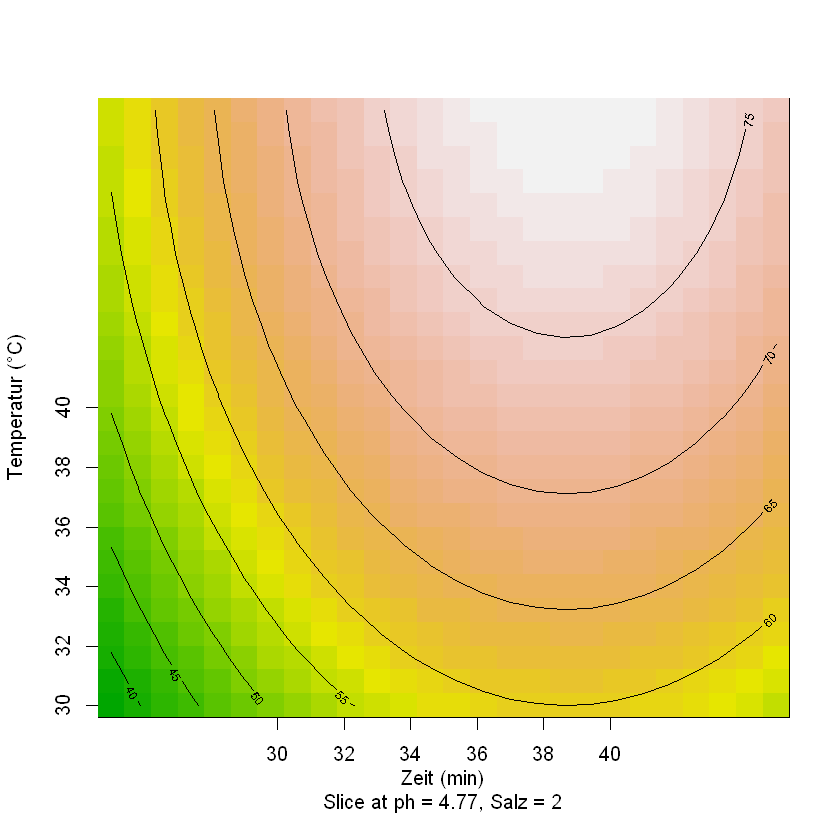

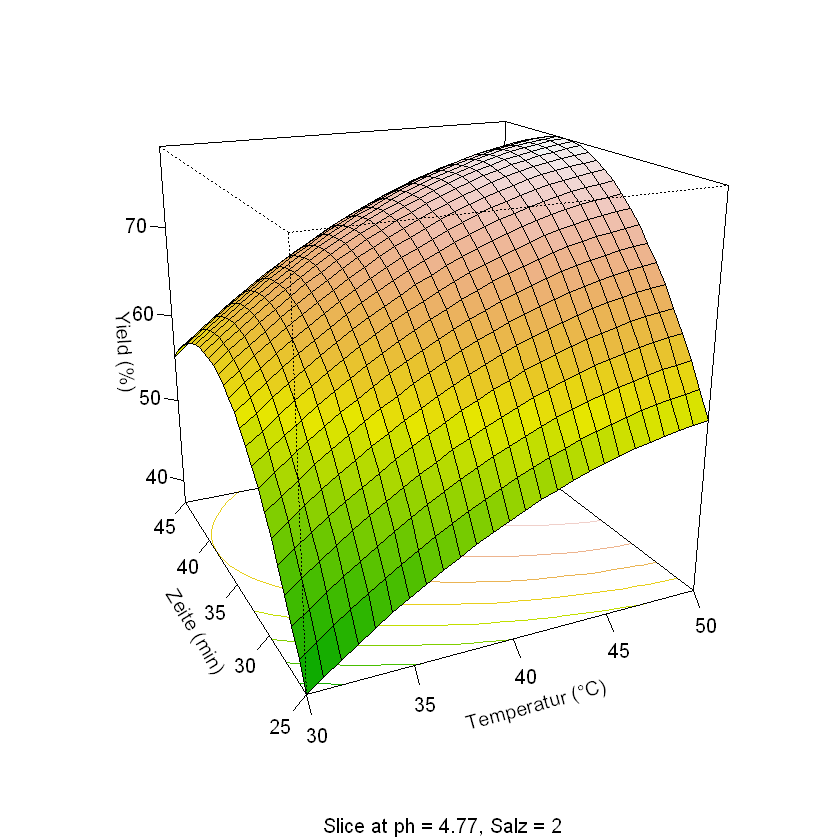

In [4]:
RSM <- as.coded.data(data, 
                x1 ~ (Time-35)/5,
                x2 ~ (Temp-40)/5,
                x3 ~ (ph-4.77)/0.77,
                x4 ~ (Salz-2)/0.25)
                     


model <- rsm(Y ~ FO(x1, x2,x3,x4)+PQ(x1, x2,x3,x4), data = RSM) 
summary(model) # Wiedergabge der Ergebnisse
contour(model, ~ x1+x2, 
        image = TRUE,
        xaxp=c(30,40,5),
        yaxp=c(30,40,5),
        xlabs=c("Zeit (min)", "Temperatur (°C)")
        )

#Darstellung als Response Surface
persp(model, x1~x2, col = terrain.colors(50), contours = "colors",
      zlab = "Yield (%)",
      xlabs=c("Zeite (min)", "Temperatur (°C)")
      )

Das Ergebnis lässt sich graphisch nicht richtig darstellen. Aber R berechnet uns den optimalen Punkt bei x1 = 0.7397260, x2 = 2.5454545, x3 = 0.4470588, x4 = 0.695652

Mithilfe des "predict" Befehls lassen wir uns den prognostizierten maximalen Response der Peakfläche berechnen:

In [ ]:
max <- data.frame(x1 = 0.7397260, x2 = 2.5454545, x3 = 0.4470588, x4 = 0.695652) # Die x,x2 (coded Units) Werte für die Prognose kommen aus der Berechnung oben
predict(model, max)

Das Maximum liegt bei 38.7 min 52.7 °C  5.1 ph-Wert  2.2 g (Salz) und weist eine Peakfläche von 80.6 (*10^8)

## Quellen

- Montgomery, D. C. (2017): Design and analysis of experiments, 9. Auflage, John Wiley & Sons Inc.
- R.Myers, D.Montgomery, C.Cook (2009): Response Surface Methodology, dritte Ausgabe, John Wiley & Sons Inc.
- K.Dunn (2020): Process Improvement Using Data
- Nešpor, J. et al. (2018): Application of response surface design to optimise the chromatographic analysis of volatile compounds in beer, Journal of the Institute of Brewing, Vol. 124 (3)
- R.Rech (2020): Design and Analysis of Experiments | DoE, Udemy Course
